In [2]:
from numpy import pi, sin, cos, power
from math import factorial

# !pip install PrettyTable
from prettytable import PrettyTable

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
a = 0
b = pi
n = int(input('N'))
print(f'a: {a}\nb: {b}\nN: {n}')

def f(x):
    return ((sin(x*cos(2*x)))/(x**2 + 5))**2
def divide_evenly(a, b, len):
    # n-1 bc: | 1 | 2 | 3 | - we divide on 4 points with 3 steps
    step = (b-a)/(len-1)
    return [a+i*step for i in range(len)] 

a: 0
b: 3.141592653589793
N: 10


In [4]:
x_list = divide_evenly(a, b ,n)
y_list = [f(i) for i in x_list]
print(x_list)
print(y_list)

[0.0, 0.3490658503988659, 0.6981317007977318, 1.0471975511965976, 1.3962634015954636, 1.7453292519943295, 2.0943951023931953, 2.443460952792061, 2.792526803190927, 3.141592653589793]
[0.0, 0.0026612985545323765, 0.0004856856522839677, 0.00672606979353648, 0.019350053192414063, 0.01537216994444243, 0.008512453285061887, 0.0014082433203238156, 0.004336219037158784, 6.783016515456898e-35]


In [72]:
def lec_newtonian(x, x_vals, y_vals):
  n = len(x_vals)
  
  def w(k, i):
    w_res = 1
    for j in range(i):
      if j == k:
        continue
      w_res *= (x_vals[k]-x_vals[j])
    return w_res
  # 
  def A(i):
    a_res = 0
    for k in range(i):
      a_res += y_vals[k]/w(k, i)
    return a_res
  # 
  res = 0
  for i in range(n):
    tmp = 1
    for j in range(i):
      tmp *= (x - x_vals[j])
    res += A(i) * tmp
  return res
  
def wiki_newtonian(x, x_vals, y_vals):
  n = len(x_vals)
  # Интерполяционная формула Ньютона
  # https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D1%8B_%D0%9D%D1%8C%D1%8E%D1%82%D0%BE%D0%BD%D0%B0

  step = x_vals[1] - x_vals[0]

  def delta(p, i):
    if p == 1:
      return y_vals[i] - y_vals[i - 1]
    else:
      return delta(p - 1, i) - delta(p - 1, i - 1)

  def C_j(j):
    if j == 0:
      return y_vals[0]
    else:
      return delta(j, j) / (factorial(j) * power(step, j))

  result = C_j(0)
  for j in range(1, n):
    s = C_j(j)
    for k in range(j):
      s *= x - x_vals[k]
    result += s

  return result

  # http://simenergy.ru/math-analysis/digital-processing/79-newton-polinomial
  # d = 0
  # p = y_vals[0]
  # for j in range(1, n):
    # print('j', j)
    # for i in range(n-j):
      # print('i', i)
      # y_vals[i] = (y_vals[i+1] - y_vals[i])/(x_vals[i+j] - x_vals[i])
    # d *= x - x_vals[j-1]
    # p += y_vals[0]*d
  # return p

# print(newtonian(10, x_list, y_list))

In [73]:
def lagrange(x, x_values, y_values):
    res = 0
    for i, (x_i, y_i) in enumerate(zip(x_values, y_values)):
        mul = 1
        for j, x_j in enumerate(x_values):
            if j != i:
                mul *= (x - x_j) / (x_i - x_j)
            else:
                continue
        res += y_i * mul
    return res

In [74]:
m = int(input('M'))
print(f'm: {m}')

m: 30


In [75]:
xm_list = divide_evenly(a, b, m)
ym_list = [f(i) for i in xm_list]
wnm = [wiki_newtonian(i, x_list, y_list) for i in xm_list]
lnm = [lec_newtonian(i, x_list, y_list) for i in xm_list]
lm = [lagrange(i, x_list, y_list) for i in xm_list]
print(xm_list)
print(ym_list)
print(wnm)
print(lnm)
print(lm)

[0.0, 0.10833078115826873, 0.21666156231653746, 0.3249923434748062, 0.43332312463307493, 0.5416539057913436, 0.6499846869496124, 0.7583154681078811, 0.8666462492661499, 0.9749770304244186, 1.0833078115826873, 1.191638592740956, 1.2999693738992248, 1.4083001550574936, 1.5166309362157622, 1.624961717374031, 1.7332924985322997, 1.8416232796905685, 1.9499540608488373, 2.058284842007106, 2.1666156231653746, 2.2749464043236434, 2.383277185481912, 2.491607966640181, 2.5999387477984497, 2.7082695289567185, 2.8166003101149872, 2.9249310912732556, 3.0332618724315243, 3.141592653589793]
[0.0, 0.0004439746619353421, 0.0014985381899350711, 0.0025111054576716146, 0.0028481776677443922, 0.0022484683189144573, 0.0010180477678408061, 5.419740235985548e-05, 0.0005904705585864344, 0.003520970359296085, 0.008559920951097656, 0.01405722516482914, 0.01799493818207836, 0.01938277098642482, 0.018689866586109122, 0.017095848577128543, 0.015527960359416774, 0.014200064473505539, 0.012598267807548537, 0.00980981

In [76]:
table = PrettyTable()

table.field_names = ["x", "f(x)", "P(X)", "L(x)"]

for xm_i, ym_i, nm_i, lm_i in zip(xm_list, ym_list, nm, lm):
    table.add_row([xm_i, ym_i, nm_i, lm_i])
print(table)

+---------------------+------------------------+------------------------+------------------------+
|          x          |          f(x)          |          P(X)          |          L(x)          |
+---------------------+------------------------+------------------------+------------------------+
|         0.0         |          0.0           |          0.0           |          0.0           |
| 0.10833078115826873 | 0.0004439746619353421  |  0.023184412497048425  | -0.016102753426633393  |
| 0.21666156231653746 | 0.0014985381899350711  |  0.013535965221845499  |  -0.00812610902206507  |
|  0.3249923434748062 | 0.0025111054576716146  | 0.0017564900330996978  | 0.0012636788508775209  |
| 0.43332312463307493 | 0.0028481776677443922  | -0.0032424801330100768 |  0.005198727836930811  |
|  0.5416539057913436 | 0.0022484683189144573  |  -0.00236028688100737  |  0.004273838763991295  |
|  0.6499846869496124 | 0.0010180477678408061  | 0.0006788404262102134  | 0.0015206504022141614  |
|  0.75831

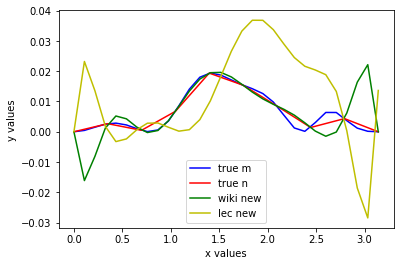

In [78]:
plt.plot(xm_list, ym_list, color='b', label='true m')
plt.plot(x_list, y_list, color='r', label='true n')
plt.plot(xm_list, wnm, color='g', label='wiki new')
plt.plot(xm_list, lnm, color='y', label='lec new')
# plt.plot(xm_list, lm, color='y', label='lag inter')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend(loc='best')